In [54]:
"""
@File    : edu_airdrop_lab.ipynb
@Create  : 2024/09/24
@Modify  : 2024/09/26 18:39:29
@Author  : Flora Sun
@Contact : floras@animocabrands.com
@Desc    : None
"""

'\n@File    : edu_airdrop_lab.ipynb\n@Create  : 2024/09/24\n@Modify  : 2024/09/26 18:39:29\n@Author  : Flora Sun\n@Contact : floras@animocabrands.com\n@Desc    : None\n'

# Import libiaries

In [55]:
import os
import numpy as np
import pandas as pd
import sybil_functions
import importlib
from datetime import datetime
from tqdm import tqdm
import requests
from time import sleep
import matplotlib.pyplot as plt
import random

importlib.reload(sybil_functions)

from sybil_functions import (
    read_from_multiple_csv,
    check_df,
    count_pairs,
    remove_contract_transactions,
    stretched_sigmoid,
    get_weight_df,
    plot_weight_dist,
    plot_weight_cumulative_dist,
    create_community,
    community_visualization,
    file_name_lst,
    random_rate
)

In [56]:
os.getcwd()

'/Users/floras/Desktop/unique-user'

In [57]:
# set the path to the focal repository
path = '/Users/floras/Desktop/unique-user'
os.chdir(path)

# Import data

## airdrop wallet

In [58]:
edu_airdrop = pd.read_json(
    "edu/data/raw_data/EDU_airdrop.json"
)
edu_airdrop = pd.DataFrame(edu_airdrop)

In [59]:
edu_airdrop_wallet = edu_airdrop["walletAddress"]

In [60]:
# to lower case
edu_airdrop_wallet = edu_airdrop_wallet.str.lower()
edu_airdrop_wallet = edu_airdrop_wallet.tolist()

## token_transfer

In [61]:
token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_token_transfers'
token_transfer_name_lst = file_name_lst(token_transfer_path, startswith="bsc")

In [62]:
token_transfer_df = read_from_multiple_csv(token_transfer_path, token_transfer_name_lst)
token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [63]:
check_df(token_transfer_df)

(829110, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index            int64
block_timestamp     object
block_number         int64
block_hash          object
amount_raw          object
dtype: object

,log_index,block_number
count,829110.000000,8.291100e+05
mean,385.444814,2.415076e+07
std,734.724967,5.840648e+06
min,0.000000,1.396978e+07
25%,141.000000,1.869658e+07
50%,256.000000,2.524435e+07
75%,444.000000,2.875184e+07
max,55709.000000,3.484866e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
74456,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x58f876857a02d6762e0101bb5c46a8c1ed44dc16,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,8616002343588278118,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,484,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,8616002343588278118
97000,0x267022751e06d97b9ee4e5f26cc1023670bdb349,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,0x1c183b23e8d7a8d287606364f741ddbdafec28de,10615596330275200000,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,479,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,10615596330275200000
97777,0xcb2b25e783a414f0d20a65afa741c51b1ad84c49,0x3fbec4e71bfca562a1631b3870ad8d79623ca2c3,0xea9f1bd192c06f3b594062231721edbb5357806d,2608000000000000000000,0x2ecd2432c32a203aabe02526f7c13062c1eb4cc972e2...,208,2022-01-01 00:06:34+00:00,13969792,0xfa4589d9bc79aee76db839324cd4f9357e5a2815b565...,2608000000000000000000
107244,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,14109370034,0x6830c1b1e77b7a5c99bff8d07c317239284268b3f750...,170,2022-01-01 00:08:22+00:00,13969828,0x046aca96814ecd1c7fa63c61ca360cad265f033abb46...,14109370034
107242,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,500000000000,0x0667e8770dfaa72d783c0f4c6fa6ba145be0f1f04e6d...,378,2022-01-01 00:08:43+00:00,13969835,0xcc9604ce294468e5f95102dcf6c46b19dc0b48dd2f6f...,500000000000


## native token transfer

In [64]:
native_token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_native_token_transfers'
native_token_transfer_name_lst = file_name_lst(native_token_transfer_path, startswith="bsc")

In [65]:
native_token_transfer_df = read_from_multiple_csv(native_token_transfer_path, native_token_transfer_name_lst)
native_token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [66]:
check_df(native_token_transfer_df)

(189105, 10)

token_address        object
transaction_hash     object
transaction_index     int64
block_timestamp      object
trace_id             object
from_address         object
to_address           object
amount_raw           object
call_type            object
block_number          int64
dtype: object

,transaction_index,block_number
count,189105.000000,1.891050e+05
mean,97.476079,2.540913e+07
std,138.107720,6.372803e+06
min,0.000000,1.396987e+07
25%,45.000000,1.995523e+07
50%,79.000000,2.653818e+07
75%,121.000000,3.051036e+07
max,6044.000000,3.484869e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number
27725,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x135f41d360be2a3c5b8a43dc23970a4edb53f1cb75d2...,43,2022-01-01 00:10:25+00:00,call_0x135f41d360be2a3c5b8a43dc23970a4edb53f1c...,0x4cd279347bd15cca417439064ee24f5ed3391a8e,0x10ed43c718714eb63d5aa57b78b54704e256024e,6183914692940477,call,13969869
26910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905
24328,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926
26919,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x2b1894a531984d150c873f5825539d51abef73109d70...,25,2022-01-01 00:13:37+00:00,call_0x2b1894a531984d150c873f5825539d51abef731...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969933
25910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6da9acaffa015ed865c84a2529946ee24b7641cb2857...,18,2022-01-01 00:13:52+00:00,call_0x6da9acaffa015ed865c84a2529946ee24b7641c...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969938


## EDU token transfer 2024 Jan - Sep

In [67]:
edu2024_transfer_path = r'edu/data/raw_data/edu_2024_transfers_JantoSep'
edu2024_transfer_name_lst = file_name_lst(edu2024_transfer_path, endswith="csv")

In [68]:
edu2024_transfer_df = read_from_multiple_csv(edu2024_transfer_path, edu2024_transfer_name_lst)
edu2024_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [69]:
check_df(edu2024_transfer_df)

(386911, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index           object
block_timestamp     object
block_number        object
block_hash          object
amount_raw          object
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
count,386911,386911,386911,386911,386911,386911,386911,386911,386911,386911
unique,1,10600,13620,300125,325600,3362,121248,241596,241596,298258
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x6425bc30d0751af5181fc74a50e760b0e4a19811,0x6425bc30d0751af5181fc74a50e760b0e4a19811,54370000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,0,"March 18, 2024, 5:44 PM","35,917,682",0xfc6ea849e769c02dddd3f5f58c406c443fde47c30879...,"54,370,000,000,000,000,000"
freq,386911,83485,89590,553,100,5139,253,100,100,553


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
122133,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x989a69a3e608483ae3f6fb21e2874f5c8fb98697,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,1222000000000000000000,0x529a6391b441a43147b6cc3d57c4308907e8c2bbad2c...,52,"April 1, 2024, 10:00 AM","37,475,937",0x891e0914c2c45a1979b10c7925bc1ca79797681afbf4...,"1,222,000,000,000,000,000,000"
152709,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x831310496dd05ecac3a99472151bbc2d2c2aab90,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,473000000000000000000,0x7987d18541eefeab90b26bf22664f9c9022db8db32a8...,133,"April 1, 2024, 10:00 AM","37,475,938",0x71db12ed3a480b59252b30a02c4d5037854abcbf78cd...,"473,000,000,000,000,000,000"
149118,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x0639556f03714a74a5feeaf5736a4a64ff70d206,0x4e387da922077e9106c0d963b2c0fecad9b550c1,20126800000000000000,0xe3359e578f880bf6fe35ac4b5ef8bd6bdca8f7f51b6d...,18,"April 1, 2024, 10:04 AM","37,476,027",0xf741b93574958f6a4dc39d128f146c2f8267a5a3e74e...,"20,126,800,000,000,000,000"
149283,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,0x67b11fed879c37c35c4fde0be843491ddcb8d054,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,447,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"
122131,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1a074554b79cc84076317941cb30c2abd0fe7993,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,443,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"


## Contract list

In [70]:
## Contract list
full_contract_path = r"edu/data/processed_data"
full_contract_file = file_name_lst(full_contract_path, startswith="contract", endswith=".csv")
full_contract_df = read_from_multiple_csv(full_contract_path, full_contract_file)
full_contract_lst = full_contract_df["address"].tolist() 

# After Airdrop

## Edu 2023 Jun22 onwards data

In [71]:
edu_airdrop_2023_transfer = token_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2023_transfer["to_address"].isin(edu_airdrop_wallet)
]

# only EDU token address
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["token_address"]
    == "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
edu_airdrop_2023_transfer["date"] = pd.to_datetime(
    edu_airdrop_2023_transfer["block_timestamp"]
).dt.date
edu_airdrop_2023_transfer["date"] = pd.to_datetime(edu_airdrop_2023_transfer["date"])

In [72]:
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["date"] >= "2023-06-22"
]

In [73]:
print(min(edu_airdrop_2023_transfer["date"]))
print(max(edu_airdrop_2023_transfer["date"]))

2023-06-22 00:00:00
2023-12-31 00:00:00


In [74]:
check_df(edu_airdrop_2023_transfer)

(5963, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                    int64
block_timestamp             object
block_number                 int64
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,log_index,block_number
count,5963.000000,5.963000e+03
mean,176.704176,3.020130e+07
std,187.992929,1.717455e+06
min,0.000000,2.931091e+07
25%,49.000000,2.932332e+07
50%,121.000000,2.933112e+07
75%,249.000000,2.947411e+07
max,3436.000000,3.482157e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
509381,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x5c693fd2d00e0729f59924d979eac65c7576a84e,22937000000000000000,0xb71bbf689e3383b1002ae6803bfd37ee5dd97b1b0629...,3,2023-06-22 01:41:21+00:00,29310908,0xb6138487681a832a958f872e1407eae62a93635ba3ff...,22937000000000000000,2023-06-22
509169,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x74e121599db43f2b11b75179aaf06f5ed6187977,2900960000000000000000,0x20b67187ba37505dde630cd5f53075fa3807f8b60c3e...,76,2023-06-22 03:36:11+00:00,29313190,0x5722d64cf65b6029b5b3cb411bdd2c32e10159f9269c...,2900960000000000000000,2023-06-22
544907,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xc590175e458b83680867afd273527ff58f74c02b,0x640f37e18b32712d5463b1b93bdc671446019581,1147000589530796786,0x5d9509c49454ac2fb21a3f87baf9f4dac68ea82d5a6a...,117,2023-06-22 04:08:42+00:00,29313837,0x4074c5766f0d361034c5079e1edbc106acca18754dd5...,1147000589530796786,2023-06-22
544032,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,0x13f4066005fa05dbff257af49034f0afb827aae5,215650263460000000000,0x4dbe345a73518bc52d7fd4451e9654f891f179e4e8dc...,5,2023-06-22 06:17:58+00:00,29316416,0xf78bcdef2fbcf2039340c7c1fe06f14f9d45ce96a932...,215650263460000000000,2023-06-22
509420,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xc590175e458b83680867afd273527ff58f74c02b,0x2219d6b2c35a7f8f34d2b77ed7791c46eb852963,2938642780683750438,0xc6a29f47798b5d652cbe0474f6d2b363b647d07291cb...,181,2023-06-22 08:04:57+00:00,29318555,0x05107c4a44ec36131129bdd336a188e11ccbaf801f28...,2938642780683750438,2023-06-22


## Supliment 2024 EDU data

In [75]:
edu_airdrop_2024_transfer = edu2024_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2024_transfer = edu_airdrop_2024_transfer[
    edu_airdrop_2024_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2024_transfer["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
edu_airdrop_2024_transfer["date"] = pd.to_datetime(
    edu_airdrop_2024_transfer["block_timestamp"]
).dt.date
edu_airdrop_2024_transfer["date"] = pd.to_datetime(edu_airdrop_2024_transfer["date"])

In [76]:
check_df(edu_airdrop_2024_transfer)

(1127, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                   object
block_timestamp             object
block_number                object
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
count,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
unique,1,380,531,517,1109,372,1037,1107,1107,512,229
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xc590175e458b83680867afd273527ff58f74c02b,125000000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,35,"February 7, 2024, 4:42 AM","35,917,682",0xfc6ea849e769c02dddd3f5f58c406c443fde47c30879...,"125,000,000,000,000,000,000",2024-02-22 00:00:00
freq,1127,281,87,268,7,12,7,7,7,268,155
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
152854,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x0e46240bc13418b931537b887f64fc1c7479179f,0x2a5164e46e4e6e1bc7034a1a7b4c307156d558f0,125000000000000000000,0xf05a99fe5fd9321fc014ec3d7df0a7831fd4d32ebfa6...,799,"April 1, 2024, 8:08 AM","37,473,713",0x3618ee3d17bfc9bbd6febe3f9eebd34572b61c871ce1...,"125,000,000,000,000,000,000",2024-04-01
101520,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x0d2de37682255fa9020037a4593fef6309e2605d,0xc590175e458b83680867afd273527ff58f74c02b,125000000000000000000,0x66424760bfbcc7ef75b6884e94287955536608d14c4d...,360,"April 10, 2024, 6:07 AM","37,730,002",0x3057e6b5fb90776d662dcc71ccc3114054a19e21589d...,"125,000,000,000,000,000,000",2024-04-10
117127,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe65bc9d90619e0f98fdb6bda851aaa19e054355a,0xe37e799d5077682fa0a244d46e5649f71457bd09,50005044021189212373,0x64db4cb9fa1ad479ab43e705117099e369d7bc6d4556...,165,"April 11, 2024, 5:14 PM","37,772,052",0x5b7e3ff6b8984db998bf0f4ff97bf919d2a4d5e52163...,"50,005,044,021,189,200,000",2024-04-11
217485,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xa050db47160cd522d8c72066ee9c162cb4d49cac,0xc590175e458b83680867afd273527ff58f74c02b,10000000000000000000,0x71702582051e97199fd53469a6a91c7d4cb1e7986d09...,121,"April 17, 2024, 6:53 PM","37,946,476",0x74310817a1915b0870782088b8bc740127ea7754e5c6...,"10,000,000,000,000,000,000",2024-04-17
202273,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xf024ca2826e9aa8a5e79b283ed7aac4802d62675,14910214513620283886,0x41a987d3db2c98426fba3b53d92027dad2c68a2f022c...,176,"April 19, 2024, 12:03 PM","37,995,772",0xcb9a6e34197a5156f56f0cf3744c34b1e69472aa52f8...,"14,910,214,513,620,300,000",2024-04-19


## Concatenate the two dataframes

In [77]:
edu_airdrop_transfer = pd.concat([edu_airdrop_2023_transfer, edu_airdrop_2024_transfer], ignore_index=True)

In [78]:
check_df(edu_airdrop_transfer)

(7090, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                   object
block_timestamp             object
block_number                object
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
count,7090,7090,7090,7090,7090,7090.0,7090,7090.0,7090,7090,7090
unique,1,2715,3911,1010,7034,1066.0,6007,6077.0,6077,1070,383
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x2812b358807f99aa251f01609222c5ea8d892f58,0x6425bc30d0751af5181fc74a50e760b0e4a19811,125000000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,34.0,2023-06-22 11:46:48+00:00,29322976.0,0xa2dd14099f19f1278d63753383a1e44b519407d4752b...,125000000000000000000,2023-06-22 00:00:00
freq,7090,2380,451,3364,7,59.0,16,16.0,16,3096,3104
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-22 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
0,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x5c693fd2d00e0729f59924d979eac65c7576a84e,22937000000000000000,0xb71bbf689e3383b1002ae6803bfd37ee5dd97b1b0629...,3,2023-06-22 01:41:21+00:00,29310908,0xb6138487681a832a958f872e1407eae62a93635ba3ff...,22937000000000000000,2023-06-22
1,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x74e121599db43f2b11b75179aaf06f5ed6187977,2900960000000000000000,0x20b67187ba37505dde630cd5f53075fa3807f8b60c3e...,76,2023-06-22 03:36:11+00:00,29313190,0x5722d64cf65b6029b5b3cb411bdd2c32e10159f9269c...,2900960000000000000000,2023-06-22
2,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xc590175e458b83680867afd273527ff58f74c02b,0x640f37e18b32712d5463b1b93bdc671446019581,1147000589530796786,0x5d9509c49454ac2fb21a3f87baf9f4dac68ea82d5a6a...,117,2023-06-22 04:08:42+00:00,29313837,0x4074c5766f0d361034c5079e1edbc106acca18754dd5...,1147000589530796786,2023-06-22
3,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,0x13f4066005fa05dbff257af49034f0afb827aae5,215650263460000000000,0x4dbe345a73518bc52d7fd4451e9654f891f179e4e8dc...,5,2023-06-22 06:17:58+00:00,29316416,0xf78bcdef2fbcf2039340c7c1fe06f14f9d45ce96a932...,215650263460000000000,2023-06-22
4,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xc590175e458b83680867afd273527ff58f74c02b,0x2219d6b2c35a7f8f34d2b77ed7791c46eb852963,2938642780683750438,0xc6a29f47798b5d652cbe0474f6d2b363b647d07291cb...,181,2023-06-22 08:04:57+00:00,29318555,0x05107c4a44ec36131129bdd336a188e11ccbaf801f28...,2938642780683750438,2023-06-22


## Remove contract addresses

### Based on API

In [178]:
all_edu_airdrop_transfer_addresses_test = list(
    set(edu_airdrop_transfer["from_address"].unique())
    .union(set(edu_airdrop_transfer["to_address"].unique()))
)
all_edu_airdrop_transfer_addresses_test = [i.lower() for i in all_edu_airdrop_transfer_addresses_test]
all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in edu_airdrop_wallet]
all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in full_contract_lst]

print(len(all_edu_airdrop_transfer_addresses_test))

1132


In [179]:
# loop through all addresses
test_contract_lst = []

for i in tqdm(range(len(all_edu_airdrop_transfer_addresses_test))):
    sleep(0.15)
    address = list(all_edu_airdrop_transfer_addresses_test)[i]
    # oklink api
    url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
    headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
    response = requests.request(method="GET", url=url, headers=headers)
    response_json = response.json()

    try:
        if response_json["status"] == "1":
            test_contract_lst.append(address)
            print(f"Address: {address}")
    except:
        print(f"Error in getting info for: {address}")
        print(response_json)
        pass

 80%|████████  | 909/1132 [06:00<01:28,  2.52it/s]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [170]:
# save the file
after_edu_contract_df = pd.DataFrame(test_contract_lst, columns=["address"])

after_edu_contract_df = pd.read_csv(
    r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/contract_after_edu_airdrop.csv"
)
contract_df = read_from_multiple_csv(contract_path, contract_file)
contract_lst = contract_df["address"].tolist() 

NameError: name 'test_contract_lst' is not defined

In [16]:
edu_airdrop_transfer = remove_contract_transactions(
    edu_airdrop_transfer,
    ["from_address", "to_address"],
    after_edu_contract_df["address"],
)

In [17]:
print(min(edu_airdrop_transfer['block_timestamp']))
print(max(edu_airdrop_transfer['block_timestamp']))

2023-06-22 01:41:21+00:00
2023-12-29 09:47:15+00:00


In [18]:
check_df(edu_airdrop_transfer)

(1907, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                    int64
block_timestamp             object
block_number                 int64
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,log_index,block_number
count,1907.000000,1.907000e+03
mean,250.478762,3.044730e+07
std,211.388082,1.831611e+06
min,0.000000,2.931091e+07
25%,129.500000,2.932351e+07
50%,218.000000,2.934126e+07
75%,320.000000,3.102741e+07
max,3436.000000,3.477419e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
509381,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x5c693fd2d00e0729f59924d979eac65c7576a84e,22937000000000000000,0xb71bbf689e3383b1002ae6803bfd37ee5dd97b1b0629...,3,2023-06-22 01:41:21+00:00,29310908,0xb6138487681a832a958f872e1407eae62a93635ba3ff...,22937000000000000000,2023-06-22
509169,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x74e121599db43f2b11b75179aaf06f5ed6187977,2900960000000000000000,0x20b67187ba37505dde630cd5f53075fa3807f8b60c3e...,76,2023-06-22 03:36:11+00:00,29313190,0x5722d64cf65b6029b5b3cb411bdd2c32e10159f9269c...,2900960000000000000000,2023-06-22
544032,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,0x13f4066005fa05dbff257af49034f0afb827aae5,215650263460000000000,0x4dbe345a73518bc52d7fd4451e9654f891f179e4e8dc...,5,2023-06-22 06:17:58+00:00,29316416,0xf78bcdef2fbcf2039340c7c1fe06f14f9d45ce96a932...,215650263460000000000,2023-06-22
508704,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1bd5371940f7d032381a2da7f7e651f4e398fdb2,0xd953bd2e2c4167417f0c14c13764c91c2d7aa5d4,505960000000000000000,0x19be2714d33d3752a614a2374c011623680375cb7346...,190,2023-06-22 08:35:00+00:00,29319154,0xb1b41a07f8897be7ce82dbba08010757995b99a0d8bd...,505960000000000000000,2023-06-22
544263,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x411d41fa6be15967020a016876891b254d7f8769,0x2b5f4808a1f5444834f9da1feb914a4ecbfac49f,500000000000000000000,0x0baac8ad98b3b3e1fd6ca85bc09f41b9c05a706b5f95...,174,2023-06-22 11:01:23+00:00,29322072,0xc831f28e524c25ff20daa2074bd6e291d4329078d5a4...,500000000000000000000,2023-06-22


## Get token transaction counts

In [19]:
edu_airdrop_pair_count = pd.DataFrame(
    count_pairs(edu_airdrop_transfer, "from_address", "to_address")
)
edu_airdrop_pair_count.columns = ["edu_transfer_count"]
edu_airdrop_pair_count = get_weight_df(edu_airdrop_pair_count)
print(len(edu_airdrop_pair_count))
display(edu_airdrop_pair_count.head(10))

1739


,pair,edu_transfer_count,wallet_a,wallet_b
0,"(0x87aeec3875067f3d4e2aa76a40fe99ca11bc8871, 0...",5,0x87aeec3875067f3d4e2aa76a40fe99ca11bc8871,0xe517f5274a21c74ae230d99010ad11992d0e836b
1,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",4,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x9daea4623ed1ddf3905e3cdfaa31d4a137079e74
2,"(0x74e121599db43f2b11b75179aaf06f5ed6187977, 0...",4,0x74e121599db43f2b11b75179aaf06f5ed6187977,0xdb3735066ed03d55fe236f5a3fd06aec064a37ac
3,"(0x676a4f96186108bbbca8497d8dd97ccd6f1b00ce, 0...",4,0x676a4f96186108bbbca8497d8dd97ccd6f1b00ce,0x8382d8e5c9f2bb6f5879ace277b7051a2c2272f2
4,"(0x8942ebf98d7e0f874e61c9f8837f795625420fa8, 0...",4,0x8942ebf98d7e0f874e61c9f8837f795625420fa8,0xec9076b1ae2fde2a34f7db58ceec40d251a01f1b
5,"(0x445f0244690fe2d920f0165324822a7dcece1a26, 0...",3,0x445f0244690fe2d920f0165324822a7dcece1a26,0xe15e1b0b0a630dbb15a693dc36d6fa0114f1af14
6,"(0x123886414e2266763317762669346ff43beb17cb, 0...",3,0x123886414e2266763317762669346ff43beb17cb,0x9af47e339456f07a8d56271a9ec0abcf0ecfc913
7,"(0x1aaf4f2957bd5a704ff16054f1826e6b31873f55, 0...",3,0x1aaf4f2957bd5a704ff16054f1826e6b31873f55,0x8bd53dcba2791129800a1b48fdf678f72b013787
8,"(0x1cf922da32d57196cc898e679c82f02aeee0de9b, 0...",3,0x1cf922da32d57196cc898e679c82f02aeee0de9b,0x27bce9ae1e31c3629dbbbdf7b22a07c04d8beb7d
9,"(0x2fa32d438fee6e2c477fe2b02bd2fd43ab96a55e, 0...",3,0x2fa32d438fee6e2c477fe2b02bd2fd43ab96a55e,0xe0fc9978f593e846f71da420a95179b571dd8382


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [20]:
# Define parameters
stretch = 1
axis_end = 6

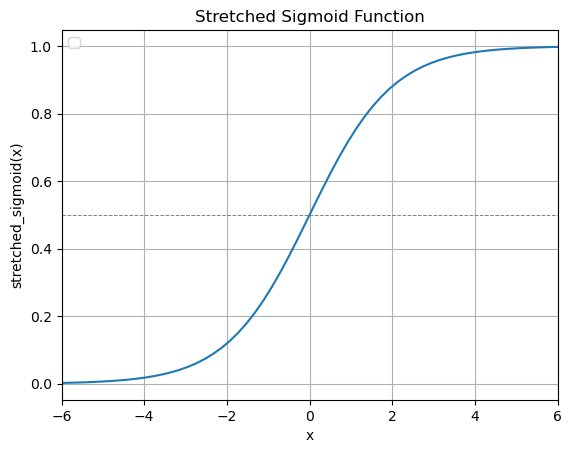

In [21]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - weight_df

In [22]:
# Copy the merged pair dataframe
weight_df = edu_airdrop_pair_count.copy()

# Check if wallets are in edu_airdrop_wallet
weight_df["if_wallet_a_in_edu"] = weight_df["wallet_a"].isin(edu_airdrop_wallet)
weight_df["if_wallet_b_in_edu"] = weight_df["wallet_b"].isin(edu_airdrop_wallet)

# Calculate the internal weight
weight_df["internal_weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the total weight
weight_df["weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)

# Sort based on weight
weight_df = weight_df.sort_values(by="weight", ascending=False)

In [23]:
check_df(weight_df)

(1739, 8)

pair                   object
edu_transfer_count      int64
wallet_a               object
wallet_b               object
if_wallet_a_in_edu       bool
if_wallet_b_in_edu       bool
internal_weight       float64
weight                float64
dtype: object

,edu_transfer_count,internal_weight,weight
count,1739.000000,1739.000000,1739.000000
mean,1.096607,0.047697,0.791899
std,0.353976,0.183094,0.189998
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,1.000000,0.000000,0.731059
max,5.000000,0.880797,1.761594


,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
29,"(0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3, 0...",2,0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
47,"(0x6f02e4903eacd40fd3fa80ef91af62c89a51df3c, 0...",2,0x6f02e4903eacd40fd3fa80ef91af62c89a51df3c,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
62,"(0x7fb0a90592eb91ee03987d833c3eaffc7d87c4e1, 0...",2,0x7fb0a90592eb91ee03987d833c3eaffc7d87c4e1,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
43,"(0x17c52c7d9bb83e73b7d7bf91d43bc24b0bf1d3af, 0...",2,0x17c52c7d9bb83e73b7d7bf91d43bc24b0bf1d3af,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
131,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",2,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x51086d7aeb872b5e001aa7bcd761460149e2b7ef,True,True,0.880797,1.761594


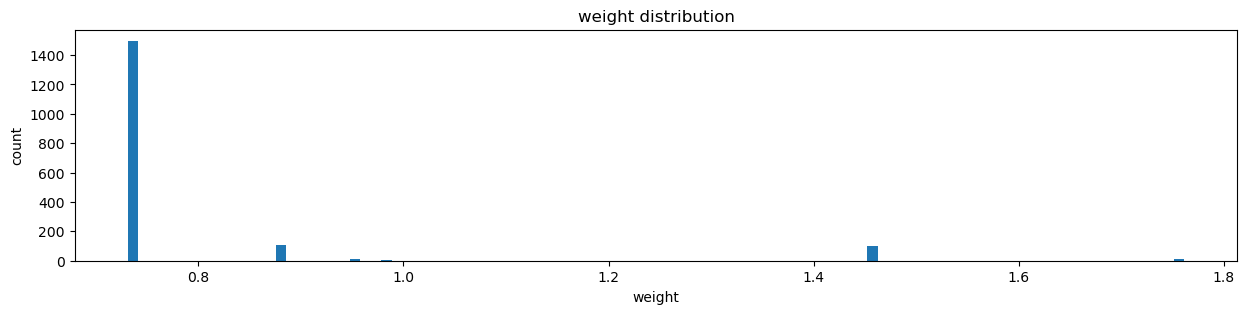

In [24]:
plot_weight_dist(weight_df)

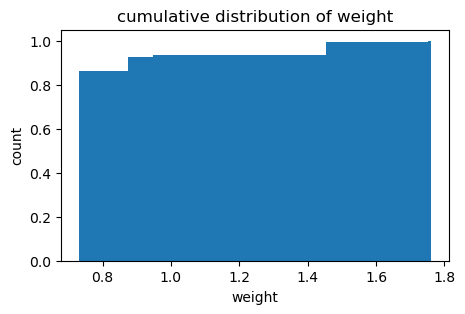

In [25]:
plot_weight_cumulative_dist(weight_df)

### 2. transfer count

#### 2.1 - weight_df_2

In [26]:
# Copy the merged pair dataframe
weight_df_2 = edu_airdrop_pair_count.copy()

# Calculate the weight between the two wallets
weight_df_2["weight"] = weight_df_2["edu_transfer_count"]

# sort based on weight
weight_df_2 = weight_df_2.sort_values(by="weight", ascending=False)

check_df(weight_df_2)

(1739, 5)

pair                  object
edu_transfer_count     int64
wallet_a              object
wallet_b              object
weight                 int64
dtype: object

,edu_transfer_count,weight
count,1739.000000,1739.000000
mean,1.096607,1.096607
std,0.353976,0.353976
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,5.000000,5.000000


,pair,edu_transfer_count,wallet_a,wallet_b,weight
0,"(0x87aeec3875067f3d4e2aa76a40fe99ca11bc8871, 0...",5,0x87aeec3875067f3d4e2aa76a40fe99ca11bc8871,0xe517f5274a21c74ae230d99010ad11992d0e836b,5
2,"(0x74e121599db43f2b11b75179aaf06f5ed6187977, 0...",4,0x74e121599db43f2b11b75179aaf06f5ed6187977,0xdb3735066ed03d55fe236f5a3fd06aec064a37ac,4
3,"(0x676a4f96186108bbbca8497d8dd97ccd6f1b00ce, 0...",4,0x676a4f96186108bbbca8497d8dd97ccd6f1b00ce,0x8382d8e5c9f2bb6f5879ace277b7051a2c2272f2,4
4,"(0x8942ebf98d7e0f874e61c9f8837f795625420fa8, 0...",4,0x8942ebf98d7e0f874e61c9f8837f795625420fa8,0xec9076b1ae2fde2a34f7db58ceec40d251a01f1b,4
1,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",4,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x9daea4623ed1ddf3905e3cdfaa31d4a137079e74,4


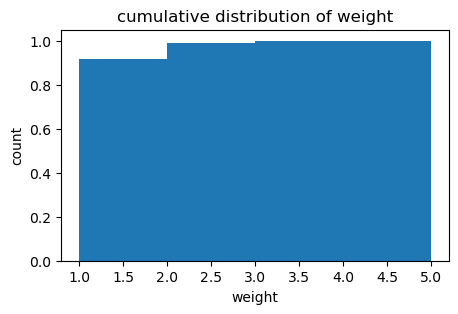

In [27]:
plot_weight_cumulative_dist(weight_df_2)

## weight -> community

### use weight_df

#### build community

In [28]:
community_lst_lou_1 = create_community(weight_df, "louvain", resolution=1)
# community_lst_s_1 = create_community(weight_df, 'surprise')
# community_lst_lei_1 = create_community(weight_df, 'leiden')

Method: louvain
Number of unique wallets: 2457
Number of edges: 1739
Number of communities detected: 770
-
Average community size: 3.190909090909091
Max community size: 105
Min community size: 1



In [127]:
# row_lst = range(10)
row_lst = [0]
community_lst_visualization_1 = community_lst_lou_1

for row in row_lst:
    print("size of community:", len(community_lst_visualization_1[row]))
    print(community_lst_visualization_1[row])
    commu_visual_df_1 = weight_df.loc[
        weight_df["wallet_a"].isin(community_lst_visualization_1[row])
        & weight_df["wallet_b"].isin(community_lst_visualization_1[row])
    ]
    # commu_visual_df_1['if_wallet_a_in_edu'] = commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # commu_visual_df_1['if_wallet_b_in_edu'] = commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", commu_visual_df_1["weight"].mean())

size of community: 105
['0x2f719992b25c9405748f628e7b99ca7934ac7fb1', '0x51086d7aeb872b5e001aa7bcd761460149e2b7ef', '0x2c21dc4fe422fbadd7dc1eda8ac4d10a8d9ffa2e', '0xa0626bb3e19a7cdbc92db674fca018001aafdd2c', '0x9daea4623ed1ddf3905e3cdfaa31d4a137079e74', '0x74e121599db43f2b11b75179aaf06f5ed6187977', '0xdb3735066ed03d55fe236f5a3fd06aec064a37ac', '0x0ecf5262e5b864e1612875f8fc18f151315b5e91', '0xca9326c4c307dc84e676e6c9c7095bde2efa981d', '0x1b765dc31f94a48468c9678b1f07ca3ef21cb951', '0xcb740e8c11fbeb02572fc1e9fea7fcf17c5259b6', '0x8894e0a0c962cb723c1976a4421c95949be2d4e3', '0x1d8a9fb891218efbe3d718257a58473cacb5338c', '0xe5b62edf76a10e3856f17e627e62a85834d78ea6', '0xa050db47160cd522d8c72066ee9c162cb4d49cac', '0xcc66f99aba77ba102c2685acc2afe2aa7e0ca098', '0x13b7f9af9dce8aa7cd978d766ab9758474221e8a', '0x8d219960b03089d23028c94de7480519a7021b5e', '0x240ac5a91756883dc28859162e04179a8072dfba', '0xead00ed237784341ee474ceabad298f96dc080c8', '0x5052fded9115c9de417fb0e263d47ef919fad27f', '0xff39843

In [128]:
community_visualization(commu_visual_df_1)

In [31]:
commu_visual_df_1

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
131,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",2,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x51086d7aeb872b5e001aa7bcd761460149e2b7ef,True,True,0.880797,1.761594
760,"(0x2c21dc4fe422fbadd7dc1eda8ac4d10a8d9ffa2e, 0...",1,0x2c21dc4fe422fbadd7dc1eda8ac4d10a8d9ffa2e,0xa0626bb3e19a7cdbc92db674fca018001aafdd2c,True,True,0.731059,1.462117
1,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",4,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x9daea4623ed1ddf3905e3cdfaa31d4a137079e74,True,False,0.000000,0.982014
2,"(0x74e121599db43f2b11b75179aaf06f5ed6187977, 0...",4,0x74e121599db43f2b11b75179aaf06f5ed6187977,0xdb3735066ed03d55fe236f5a3fd06aec064a37ac,True,False,0.000000,0.982014
18,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",3,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xca9326c4c307dc84e676e6c9c7095bde2efa981d,True,False,0.000000,0.952574
...,...,...,...,...,...,...,...,...
735,"(0x5052fded9115c9de417fb0e263d47ef919fad27f, 0...",1,0x5052fded9115c9de417fb0e263d47ef919fad27f,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,True,False,0.000000,0.731059
732,"(0x776a0772fc76fc5e8e1036346f460144f618a6b0, 0...",1,0x776a0772fc76fc5e8e1036346f460144f618a6b0,0xcefc8bd0d3403215617517fe8cc2ff68e48ef04a,True,False,0.000000,0.731059
730,"(0x5052fded9115c9de417fb0e263d47ef919fad27f, 0...",1,0x5052fded9115c9de417fb0e263d47ef919fad27f,0x68e2852bd474c67a69568df4477f1c0d828cb42a,True,False,0.000000,0.731059
728,"(0x3ee4ce2bb52b8d684cea988c6e09c45a43bfe44d, 0...",1,0x3ee4ce2bb52b8d684cea988c6e09c45a43bfe44d,0x776a0772fc76fc5e8e1036346f460144f618a6b0,False,True,0.000000,0.731059


In [32]:
commu_visual_df_1[
    (commu_visual_df_1["wallet_a"] != "0x518176cf1594b388ecca1ac9b6a7c3fe6482f387")
    & (commu_visual_df_1["wallet_b"] != "0x518176cf1594b388ecca1ac9b6a7c3fe6482f387")
]

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
131,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",2,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x51086d7aeb872b5e001aa7bcd761460149e2b7ef,True,True,0.880797,1.761594
760,"(0x2c21dc4fe422fbadd7dc1eda8ac4d10a8d9ffa2e, 0...",1,0x2c21dc4fe422fbadd7dc1eda8ac4d10a8d9ffa2e,0xa0626bb3e19a7cdbc92db674fca018001aafdd2c,True,True,0.731059,1.462117
1,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",4,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x9daea4623ed1ddf3905e3cdfaa31d4a137079e74,True,False,0.000000,0.982014
2,"(0x74e121599db43f2b11b75179aaf06f5ed6187977, 0...",4,0x74e121599db43f2b11b75179aaf06f5ed6187977,0xdb3735066ed03d55fe236f5a3fd06aec064a37ac,True,False,0.000000,0.982014
18,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",3,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xca9326c4c307dc84e676e6c9c7095bde2efa981d,True,False,0.000000,0.952574
...,...,...,...,...,...,...,...,...
735,"(0x5052fded9115c9de417fb0e263d47ef919fad27f, 0...",1,0x5052fded9115c9de417fb0e263d47ef919fad27f,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,True,False,0.000000,0.731059
732,"(0x776a0772fc76fc5e8e1036346f460144f618a6b0, 0...",1,0x776a0772fc76fc5e8e1036346f460144f618a6b0,0xcefc8bd0d3403215617517fe8cc2ff68e48ef04a,True,False,0.000000,0.731059
730,"(0x5052fded9115c9de417fb0e263d47ef919fad27f, 0...",1,0x5052fded9115c9de417fb0e263d47ef919fad27f,0x68e2852bd474c67a69568df4477f1c0d828cb42a,True,False,0.000000,0.731059
728,"(0x3ee4ce2bb52b8d684cea988c6e09c45a43bfe44d, 0...",1,0x3ee4ce2bb52b8d684cea988c6e09c45a43bfe44d,0x776a0772fc76fc5e8e1036346f460144f618a6b0,False,True,0.000000,0.731059


#### filter and expand the community list

In [78]:
# filtered_list_of_lists = [
#     [item for item in sublist if item in edu_airdrop_wallet]
#     for sublist in community_lst_visualization_1
# ]
filtered_list_of_lists = community_lst_visualization_1
filtered_list_of_lists = sorted(filtered_list_of_lists, key=len, reverse=True)

In [79]:
# For wallets that are not in any community, add them as single element lists
filtered_list_of_lists.extend(
    [
        [item]
        for item in edu_airdrop_wallet
        if item
        not in [subitem for sublist in filtered_list_of_lists for subitem in sublist]
    ]
)

In [35]:
airdrop_wallet_count = len(edu_airdrop_wallet)
airdrop_user_count = len([len(x) for x in filtered_list_of_lists])

In [36]:
display(airdrop_wallet_count)
display(airdrop_user_count)

airdrop_user_count / airdrop_wallet_count

3015

2246

0.7449419568822554

# Before Airdrop

## Before Airdrop - native token

In [37]:
before_bsc_native_file_path = r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/edu_airdrop_wallet_native_token_transfers"
before_bsc_native_file_lst = file_name_lst(
    before_bsc_native_file_path,
    startswith="bsc_native_token_transfers"
)
before_bsc_native_transfers_all = read_from_multiple_csv(
    before_bsc_native_file_path, before_bsc_native_file_lst
)

In [38]:
before_bsc_native_transfers = before_bsc_native_transfers_all.copy()

# select only the transactions between the airdrop wallets
before_bsc_native_transfers = before_bsc_native_transfers[
    before_bsc_native_transfers["from_address"].isin(edu_airdrop_wallet)
    | before_bsc_native_transfers["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
before_bsc_native_transfers["date"] = pd.to_datetime(
    before_bsc_native_transfers["block_timestamp"]
).dt.date
before_bsc_native_transfers["date"] = pd.to_datetime(before_bsc_native_transfers["date"])

# Filter the transactions based on date
before_bsc_native_transfers = before_bsc_native_transfers[
    (before_bsc_native_transfers["date"] <= "2023-06-21")
    & (before_bsc_native_transfers["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_bsc_native_transfers.sort_values(by="block_timestamp", inplace=True)

In [39]:
check_df(before_bsc_native_transfers)

(48012, 11)

token_address                object
transaction_hash             object
transaction_index             int64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
dtype: object

,transaction_index,block_number
count,48012.000000,4.801200e+04
mean,81.317254,2.710431e+07
std,66.500250,1.268488e+06
min,0.000000,2.439411e+07
25%,39.000000,2.618365e+07
50%,71.000000,2.710271e+07
75%,107.000000,2.816683e+07
max,2606.000000,2.930868e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date
9747,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01
9708,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01
9753,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01
9740,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01
9755,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01


## Before Airdrop - other token

In [40]:
before_token_file_path = r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/edu_airdrop_wallet_token_transfers"
before_token_file_lst = file_name_lst(
    before_token_file_path,
    startswith="bsc"
)
before_token_transfers_all = read_from_multiple_csv(
    before_token_file_path, before_token_file_lst
)

In [41]:
before_token_transfer = before_token_transfers_all.copy()

# select only the transactions between the airdrop wallets
before_token_transfer = before_token_transfer[
    before_token_transfer["from_address"].isin(edu_airdrop_wallet)
    | before_token_transfer["to_address"].isin(edu_airdrop_wallet)
]

# exclude EDU token address
before_token_transfer = before_token_transfer[
    before_token_transfer["token_address"]
    != "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
before_token_transfer["date"] = pd.to_datetime(
    before_token_transfer["block_timestamp"]
).dt.date
before_token_transfer["date"] = pd.to_datetime(before_token_transfer["date"])

# Filter the transactions based on date
before_token_transfer = before_token_transfer[
    (before_token_transfer["date"] <= "2023-06-21")
    & (before_token_transfer["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_token_transfer.sort_values(by="block_timestamp", inplace=True)

In [42]:
check_df(before_token_transfer)

(258097, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                    int64
block_timestamp             object
block_number                 int64
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,log_index,block_number
count,258097.000000,2.580970e+05
mean,396.673731,2.704285e+07
std,781.220551,1.282512e+06
min,0.000000,2.439427e+07
25%,135.000000,2.613268e+07
50%,241.000000,2.698742e+07
75%,436.000000,2.816885e+07
max,55709.000000,2.930888e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
3396,0x55d398326f99059ff775485246999027b3197955,0x5665785813011a5c37c10972f8d3d463441637c3,0x2e750b5d03ff1b1c926225982fac3f5cb761fe18,0,0x557713b0f7ef5ba7c01f3811bebdae53b5383137e5a9...,93,2023-01-01 00:30:59+00:00,24394271,0xc774fde8c832cd710fda9f83d1024350b583c86c02e5...,0,2023-01-01
1421,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xc590175e458b83680867afd273527ff58f74c02b,0xe1051fdb83569bea32658ff95e6b08afef372d70,24349528786727813119,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,162,2023-01-01 00:44:41+00:00,24394545,0xd5024c88189ec715311cf5f40ee69b6b38e9fb8500ca...,24349528786727813119,2023-01-01
1416,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xe1051fdb83569bea32658ff95e6b08afef372d70,0xac771ec0d1dda2cabffc1e32e103394707e50c9c,70000000000000000000,0xfa1206127ed454e160c68b466de288a19fd32843ae82...,150,2023-01-01 00:46:23+00:00,24394579,0x3f96a8ecae11ae120013e4eefaa159470400e245a7ad...,70000000000000000000,2023-01-01
3288,0x4a8e348b29df68fa4d874b043f920150d750604e,0x0000000000000000000000000000000000000000,0xfbd08fd2b2c7148b4e38624158c3155b5b49f886,518928,0x572b77322f02b0e0f2ad317bc9f0170bf0db55091fff...,187,2023-01-01 00:52:29+00:00,24394701,0xf8ae4b7bd004d004e5d2a5c4a1598719ec5ec87c0768...,518928,2023-01-01
3197,0x4a8e348b29df68fa4d874b043f920150d750604e,0x0000000000000000000000000000000000000000,0x6cb60ea44123b24daf738bb74990e7a615d49559,518936,0x7f213b5fe49999ddedf632414a484ea64a3589effba3...,93,2023-01-01 01:03:29+00:00,24394921,0xc42fae29345c280e3b414067de2e2a6ac497f7bedf80...,518936,2023-01-01


## Concate before_bsc_native_transfers and before_token_transfer

In [43]:
before_bsc_transfers = pd.concat(
    [before_bsc_native_transfers, before_token_transfer], ignore_index=True
)

In [44]:
# # remove transactions with same from and to address
# before_bsc_transfers = before_bsc_transfers[
#     before_bsc_transfers["from_address"] != before_bsc_transfers["to_address"]
# ]

In [45]:
check_df(before_bsc_transfers)

(306109, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,48012.000000,3.061090e+05,258097.000000
mean,81.317254,2.705249e+07,396.673731
std,66.500250,1.280516e+06,781.220551
min,0.000000,2.439411e+07,0.000000
25%,39.000000,2.614048e+07,135.000000
50%,71.000000,2.701859e+07,241.000000
75%,107.000000,2.816854e+07,436.000000
max,2606.000000,2.930888e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
0,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31.0,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01,NaN,NaN,NaN
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7.0,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25.0,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01,NaN,NaN,NaN
3,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48.0,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01,NaN,NaN,NaN
4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29.0,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01,NaN,NaN,NaN


## Remove contract transactions

In [46]:
all_before_bsc_transfer_addresses = list(
    set(before_bsc_transfers["from_address"].unique()).union(
        set(before_bsc_transfers["to_address"].unique())
    )
)
all_before_bsc_transfer_addresses = [x for x in all_before_bsc_transfer_addresses if x not in edu_airdrop_wallet]
print(len(all_before_bsc_transfer_addresses))

36912


In [47]:
# # loop through all addresses
# contract_lst = []

# for i in tqdm(range(62067, len(all_before_bsc_transfer_addresses))):
#     sleep(0.15)
#     address = list(all_before_bsc_transfer_addresses)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             contract_lst.append(address)
#             # print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [48]:
# # save the file
# before_bnb_contract_df = pd.DataFrame(contract_lst, columns=["address"])
# before_bnb_contract_df.to_csv(
#     r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/before_bnb_contract.csv",
#     index=False,
# )·
before_bnb_contract_df = pd.read_csv(
    r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/before_bnb_contract.csv"
)

In [49]:
before_bsc_transfers = remove_contract_transactions(
    before_bsc_transfers,
    ["from_address", "to_address"],
    before_bnb_contract_df["address"],
)
before_bsc_transfers = remove_contract_transactions(
    before_bsc_transfers,
    ["from_address", "to_address"],
    after_edu_contract_df["address"],
)

In [50]:
print(min(before_bsc_transfers['block_timestamp']))
print(max(before_bsc_transfers['block_timestamp']))

2023-01-01 00:23:08+00:00
2023-06-21 23:49:54+00:00


In [51]:
check_df(before_bsc_transfers)

(152959, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,31687.000000,1.529590e+05,121272.000000
mean,78.153880,2.701267e+07,494.650233
std,66.779844,1.274216e+06,1059.854844
min,0.000000,2.439411e+07,0.000000
25%,34.000000,2.603315e+07,141.000000
50%,68.000000,2.702131e+07,282.000000
75%,105.000000,2.808360e+07,562.000000
max,2606.000000,2.930868e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
0,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31.0,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01,NaN,NaN,NaN
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7.0,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25.0,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01,NaN,NaN,NaN
3,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48.0,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01,NaN,NaN,NaN
4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29.0,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01,NaN,NaN,NaN


## Get bnb transaction counts

In [52]:
before_bsc_pair_count = pd.DataFrame(
    count_pairs(before_bsc_transfers, "from_address", "to_address")
)
before_bsc_pair_count.columns = ["before_bsc_transfer_count"]
before_bsc_pair_count = get_weight_df(before_bsc_pair_count)

before_bsc_pair_count["if_wallet_a_in_edu"] = before_bsc_pair_count["wallet_a"].isin(
    edu_airdrop_wallet
)
before_bsc_pair_count["if_wallet_b_in_edu"] = before_bsc_pair_count["wallet_b"].isin(
    edu_airdrop_wallet
)


print(len(before_bsc_pair_count))
display(before_bsc_pair_count[before_bsc_pair_count["before_bsc_transfer_count"] == 40])

66634


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu
158,"(0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558, 0...",40,0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558,0xe4edb277e41dc89ab076a1f049f4a3efa700bce8,True,False
159,"(0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce, 0...",40,0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce,0xa7b8149bbf761ebcfa5f7b7431c6d72dfcd49965,True,False
160,"(0x674092069ac4f1e6ec911af630eb3ca05dfd08f9, 0...",40,0x674092069ac4f1e6ec911af630eb3ca05dfd08f9,0xac0e13391c9cacd25d523b2b98ddab418578b0bc,True,False
161,"(0x922779aae2cc05773b4810fe6ba70e4769d7f51b, 0...",40,0x922779aae2cc05773b4810fe6ba70e4769d7f51b,0xf03186a1fd2b42046768dcdb5aa30604a97747d5,False,True


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [53]:
# Define parameters
stretch = 1
axis_end = 15

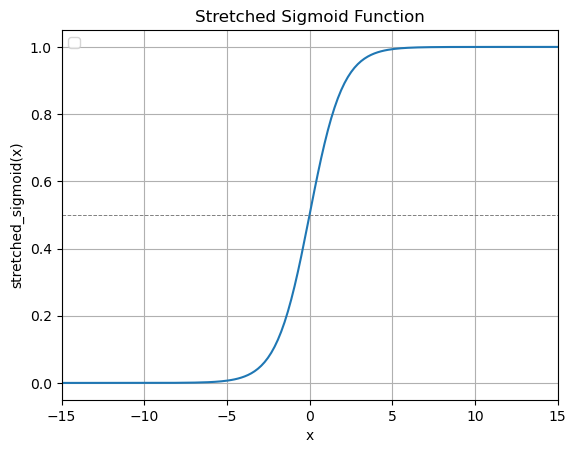

In [54]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - before_weight_df

In [55]:
# Copy the merged pair dataframe
before_weight_df = before_bsc_pair_count.copy()


# Calculate the internal weight
before_weight_df["internal_weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the weight between the two wallets
before_weight_df["weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)


# sort based on weight
before_weight_df = before_weight_df.sort_values(by="weight", ascending=False)

In [56]:
check_df(before_weight_df)

(66634, 8)

pair                          object
before_bsc_transfer_count      int64
wallet_a                      object
wallet_b                      object
if_wallet_a_in_edu              bool
if_wallet_b_in_edu              bool
internal_weight              float64
weight                       float64
dtype: object

,before_bsc_transfer_count,internal_weight,weight
count,66634.000000,66634.000000,66634.000000
mean,2.295510,0.007221,0.804330
std,9.133744,0.077064,0.127018
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,2.000000,0.000000,0.880797
max,1244.000000,1.000000,2.000000


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
72,"(0x597a3beac9e112a21e20cdc1b255ffd9f6b21994, 0...",82,0x597a3beac9e112a21e20cdc1b255ffd9f6b21994,0x8e99ef09f2d5b709f302edc3e5a9773a78667d48,True,True,1.0,2.0
80,"(0x8e99ef09f2d5b709f302edc3e5a9773a78667d48, 0...",73,0x8e99ef09f2d5b709f302edc3e5a9773a78667d48,0x8e99ef09f2d5b709f302edc3e5a9773a78667d48,True,True,1.0,2.0
97,"(0x06b181369289d8ce2643b8a0f4758f70d8446d79, 0...",60,0x06b181369289d8ce2643b8a0f4758f70d8446d79,0x6c31eca8bec70c527767efd121e601deabd59307,True,True,1.0,2.0
347,"(0x4e3cc50553f0d8544a298517844421c7f316ecf1, 0...",25,0x4e3cc50553f0d8544a298517844421c7f316ecf1,0xecc3ea933bc0ac559c984d7aab9655fdd567cfa5,True,True,1.0,2.0
570,"(0xd8c7fff9bdb43ed956f851100bba06cdd3ca1c44, 0...",20,0xd8c7fff9bdb43ed956f851100bba06cdd3ca1c44,0xe9715823f9254369ffbe64946242c840603e31ad,True,True,1.0,2.0


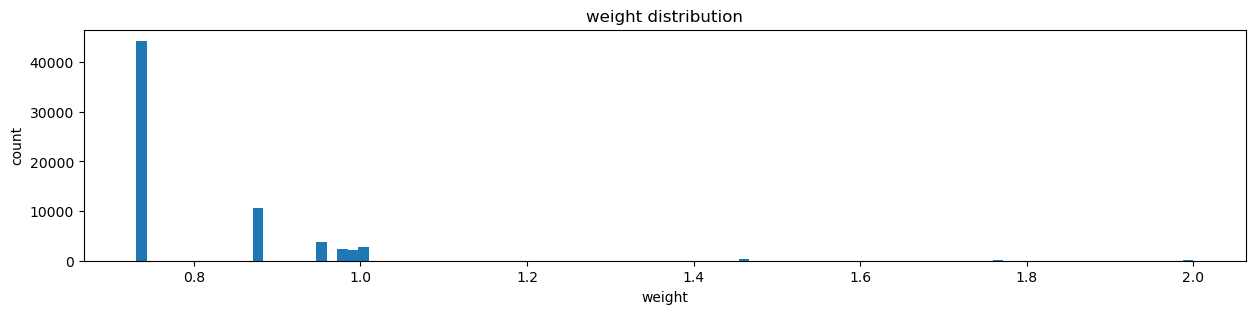

In [57]:
plot_weight_dist(before_weight_df)

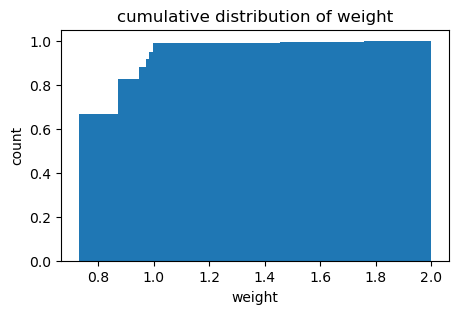

In [58]:
plot_weight_cumulative_dist(before_weight_df)

### 2. transfer count

#### 2.1 - before_weight_df_2

In [374]:
# Copy the merged pair dataframe
before_weight_df_2 = before_bsc_pair_count.copy()

# Calculate the weight between the two wallets
before_weight_df_2["weight"] = before_weight_df_2["before_bsc_transfer_count"]

# sort based on weight
before_weight_df_2 = before_weight_df_2.sort_values(by="weight", ascending=False)

check_df(before_weight_df_2)

(66634, 7)

pair                         object
before_bsc_transfer_count     int64
wallet_a                     object
wallet_b                     object
if_wallet_a_in_edu             bool
if_wallet_b_in_edu             bool
weight                        int64
dtype: object

,before_bsc_transfer_count,weight
count,66634.000000,66634.000000
mean,2.295510,2.295510
std,9.133744,9.133744
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,1244.000000,1244.000000


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,weight
0,"(0x171155f3e60ed761e7e32c54bbd771520dca1af3, 0...",1244,0x171155f3e60ed761e7e32c54bbd771520dca1af3,0xa6b133935e4d9de6a8c7a29f93d6da400a365585,False,True,1244
1,"(0x1fe82bea7aa95e9595777a10712a4a60bcf9c6be, 0...",657,0x1fe82bea7aa95e9595777a10712a4a60bcf9c6be,0xe4edb277e41dc89ab076a1f049f4a3efa700bce8,True,False,657
2,"(0xb0031c0bb02b67e67f0e1007fb6e897cf4fa58d1, 0...",546,0xb0031c0bb02b67e67f0e1007fb6e897cf4fa58d1,0xb41e31a4ddc1c3ed12ee1ade86f01ff1e3f9fb27,False,True,546
3,"(0xa6b133935e4d9de6a8c7a29f93d6da400a365585, 0...",444,0xa6b133935e4d9de6a8c7a29f93d6da400a365585,0xb393dab083af03fabc73af3308aea180a9e3479f,True,False,444
4,"(0xa6b133935e4d9de6a8c7a29f93d6da400a365585, 0...",388,0xa6b133935e4d9de6a8c7a29f93d6da400a365585,0xc2d501f08ec70d73cbaef625ec5161f166dec3f6,True,False,388


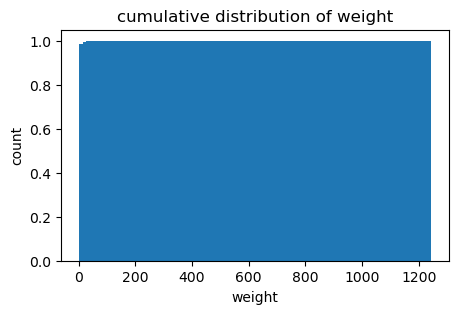

In [375]:
plot_weight_cumulative_dist(before_weight_df_2)

## weight -> community

### use before_weight_df

#### build community

In [59]:
before_community_lst_lou_1 = create_community(before_weight_df, "louvain", resolution=1)
# before_community_lst_s_1 = create_community(before_weight_df, 'surprise')
# before_community_lst_lei_1 = create_community(before_weight_df, 'leiden')

Method: louvain
Number of unique wallets: 38954
Number of edges: 66634
Number of communities detected: 207
-
Average community size: 188.18357487922705
Max community size: 4321
Min community size: 2



In [60]:
before_row_lst = range(5)
before_row_lst = [0]

before_community_lst_visualization_1 = before_community_lst_lou_1

for row in before_row_lst:
    print("size of community:", len(before_community_lst_visualization_1[row]))
    print(before_community_lst_visualization_1[row])
    before_commu_visual_df_1 = before_weight_df.loc[
        before_weight_df["wallet_a"].isin(before_community_lst_visualization_1[row])
        & before_weight_df["wallet_b"].isin(before_community_lst_visualization_1[row])
    ]
    # before_commu_visual_df_1['if_wallet_a_in_edu'] = before_commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # before_commu_visual_df_1['if_wallet_b_in_edu'] = before_commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", before_commu_visual_df_1["weight"].mean())

size of community: 4321
['0x84b8da634d034ff8067503cea37828c77a9cbeab', '0xa405655a86ae9d7fd9446347c0e029dde0642daa', '0xff9f20367488f3386a97bc3897798b0e8bd1b2da', '0x77f04ad8a9ec8438b5a5f27436eb844d94aed61e', '0x2b5b1fb6aae750710f945b832d27fffab9888888', '0x674092069ac4f1e6ec911af630eb3ca05dfd08f9', '0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1', '0x207495e53aa552c10e44c7cc9dcaceb83b2eb688', '0x22a85880abc847f07bdc00d3434ea3032f53db02', '0xde9a9425b3ce28f66719ea606b1d1fdda210a94d', '0x8dd13798da3f75a472529afe5b76e6a74c962b84', '0x25f61313de89c6effded2dbcdf6082547b5d8a53', '0x438b17e9e37f2aa691278f1f32a598d7ca06d876', '0xb395568dc18b51837867b08a84b87c63b4317d54', '0xfb64df081266b41f62af73562c274a42c020bb81', '0xf329d3d60678c5c088dd993d3327b15597632695', '0x4f4f7202b3336d35860aa5fd1403a344f6666666', '0x08c979af77142000124a257b3aed26625d21a6d7', '0x2c39b8c5b9d31299449474a4d0bcd8f9a32751e4', '0x6a53198fb773aa86447579020e6c2b55b35dc314', '0x8c702a9a6e0cd14a53251c630743c4f5327edde8', '0x1c94f9

In [386]:
# community_visualization(before_commu_visual_df_1)

In [61]:
before_commu_visual_df_1

,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
2730,"(0x84b8da634d034ff8067503cea37828c77a9cbeab, 0...",7,0x84b8da634d034ff8067503cea37828c77a9cbeab,0xa405655a86ae9d7fd9446347c0e029dde0642daa,True,True,0.999089,1.998178
2804,"(0xa405655a86ae9d7fd9446347c0e029dde0642daa, 0...",6,0xa405655a86ae9d7fd9446347c0e029dde0642daa,0xff9f20367488f3386a97bc3897798b0e8bd1b2da,True,True,0.997527,1.995055
3993,"(0x77f04ad8a9ec8438b5a5f27436eb844d94aed61e, 0...",5,0x77f04ad8a9ec8438b5a5f27436eb844d94aed61e,0xff9f20367488f3386a97bc3897798b0e8bd1b2da,True,True,0.993307,1.986614
5296,"(0x2b5b1fb6aae750710f945b832d27fffab9888888, 0...",4,0x2b5b1fb6aae750710f945b832d27fffab9888888,0x84b8da634d034ff8067503cea37828c77a9cbeab,True,True,0.982014,1.964028
6590,"(0x674092069ac4f1e6ec911af630eb3ca05dfd08f9, 0...",4,0x674092069ac4f1e6ec911af630eb3ca05dfd08f9,0xa405655a86ae9d7fd9446347c0e029dde0642daa,True,True,0.982014,1.964028
...,...,...,...,...,...,...,...,...
36880,"(0x25f61313de89c6effded2dbcdf6082547b5d8a53, 0...",1,0x25f61313de89c6effded2dbcdf6082547b5d8a53,0xfa148371d619a9d6ae76d03f77e0d810fd4d177c,True,False,0.000000,0.731059
36886,"(0x2b5b1fb6aae750710f945b832d27fffab9888888, 0...",1,0x2b5b1fb6aae750710f945b832d27fffab9888888,0xbda6d208fd427588f993265a6f85feaaa7812759,True,False,0.000000,0.731059
36887,"(0x1ac6c8e3afe22e7ca0e1f2a7e8e4908394d82759, 0...",1,0x1ac6c8e3afe22e7ca0e1f2a7e8e4908394d82759,0x2b5b1fb6aae750710f945b832d27fffab9888888,False,True,0.000000,0.731059
36888,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",1,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0x3677616b8648c14f6a5555e8b2643d0a3abea4a2,True,False,0.000000,0.731059


#### filter and expand the community list

In [80]:
# kepp only the wallets that are in the airdrop list
# before_filtered_list_of_lists = [
#     [item for item in sublist if item in edu_airdrop_wallet]
#     for sublist in before_community_lst_visualization_1
# ]

before_filtered_list_of_lists = before_community_lst_visualization_1.copy()


before_filtered_list_of_lists = sorted(
    before_filtered_list_of_lists, key=len, reverse=True
)

In [81]:
# For wallets that are not in any community, add them as single element lists
before_filtered_list_of_lists.extend(
    [
        [item]
        for item in edu_airdrop_wallet
        if item
        not in [
            subitem for sublist in before_filtered_list_of_lists for subitem in sublist
        ]
    ]
)

In [82]:
before_airdrop_user_count = len([len(x) for x in before_filtered_list_of_lists])

In [83]:
display(airdrop_wallet_count)
display(before_airdrop_user_count)

before_airdrop_user_count / airdrop_wallet_count

3015

1086

0.36019900497512436

# Compare before and after

In [87]:
display(len(before_filtered_list_of_lists))
display([len(x) for x in before_filtered_list_of_lists][:10])

1086

[4321, 3981, 2654, 1886, 1773, 1731, 1706, 1690, 1324, 1284]

In [88]:
display(len(filtered_list_of_lists))
display([len(x) for x in filtered_list_of_lists][:10])

2246

[105, 86, 51, 47, 47, 45, 41, 24, 23, 21]

## Similarity between the two communities

In [89]:
before_num = 0
after_num = 0
before_set = set(before_filtered_list_of_lists[before_num])
after_set = set(filtered_list_of_lists[after_num])
print("Before:", len(before_set))
print("After:", len(after_set))

common_elements = before_set.intersection(after_set)
print("Common:", len(common_elements))
similarity = len(common_elements) / min(len(before_set), len(after_set))
print(similarity)

Before: 4321
After: 105
Common: 0
0.0


## compare only big-community wallets

In [99]:
before_big_commu_wallets = [
    wallet
    for community in before_filtered_list_of_lists
    if len(community) > 3
    for wallet in community
    if wallet in edu_airdrop_wallet
]
after_big_commu_wallets = [
    wallet
    for community in filtered_list_of_lists
    if len(community) > 3
    for wallet in community
    if wallet in edu_airdrop_wallet
]

In [109]:
print("Before:", len(before_big_commu_wallets))
print("After:", len(after_big_commu_wallets))
print("")

common_big_wallets = set(before_big_commu_wallets).intersection(
    set(after_big_commu_wallets)
)
print("Common:", len(common_big_wallets))
big_similarity = len(common_big_wallets) / min(
    len(before_big_commu_wallets), len(after_big_commu_wallets)
)
print("Common rate: ", big_similarity)
print("")

random_rate(
    len(before_big_commu_wallets), len(after_big_commu_wallets), edu_airdrop_wallet
)

Before: 2002
After: 796

Common: 568
Common rate:  0.7135678391959799



0.6657537688442211

### find uncommon wallets

In [110]:
def uncommon_wallets(lst_1, lst_2):
    # find wallets in lst1 but not in lst2
    diff = set(lst_1).difference(set(lst_2))
    return list(diff)

In [111]:
def find_commu_for_wallet(wallet, community_lst):
    for i, community in enumerate(community_lst):
        if wallet in community:
            return i
    return None

In [112]:
only_in_before = uncommon_wallets(before_big_commu_wallets, after_big_commu_wallets)
only_in_after = uncommon_wallets(after_big_commu_wallets, before_big_commu_wallets)

#### Explore only_in_before

In [113]:
print(len(only_in_before))
only_in_before

1434


['0x7abf799978c06bc2e79ecfd982f546b45e237271',
 '0x45c936033e4400741faaae8323cc716d5d97dacf',
 '0x24726bb1c7996dbe80dae1e87799034125577144',
 '0xac659ecb1fb7aef89add92a3f45556de6a9a18d5',
 '0x50f6866be52085478dd2c7fe9c04443448293e5e',
 '0x1416e20d666ae4ab9a8cf3ff05a77c054f700f30',
 '0xef6d4051f07b4ab38edf4c65497163ea73a9159f',
 '0xd1c8df0cbc0e8ba54d6a2dbc15436276bb87e365',
 '0x63ddcb917ed8e3edb4d7f1ecd060f9ddde3d1024',
 '0xf6b0ed4ce3ccf7f65655d61766fb385c787288a1',
 '0x1333bbad610be7b5dc6b7630451587405e685761',
 '0x96f89b37334dba99b867ab812c1bbdf2e2103d23',
 '0x36c9fec81193d86c4cc4953a59e59db948091c00',
 '0x602f54b4655ca08ddf886a6fc49af093ceda328b',
 '0x9523aaea796f0d1e5f4c104ec40fc67dd07836e8',
 '0x11c486e7bf25b8548d8f181420316f01fd43f4a2',
 '0xcc681fcac73a986fb05c08afc09ceac973a2fd63',
 '0xf3de14b366576015d531ed71d437c1fa599ec18c',
 '0x27f0c9d4bc20509bdb6276325df2c5100aec9afe',
 '0xd950e427b2e20a4b4e5a220930e0d7af347a9d57',
 '0x7affb749963497675ab596ffd4fc7383baee90d0',
 '0x6518b98e2

In [114]:
def find_transfer_for_wallet(wallet, transfer_df, and_or="or"):
    if and_or == "or":
        return transfer_df[
            (transfer_df["wallet_a"] == wallet) | (transfer_df["wallet_b"] == wallet)
        ]
    else:
        return transfer_df[
            (transfer_df["wallet_a"] == wallet) & (transfer_df["wallet_b"] == wallet)
        ]

In [115]:
# find which community the only_before wallet belongs to after airdrop
only_before_in_after = {}
for i, wallet in enumerate(only_in_before):
    num_trans = find_transfer_for_wallet(wallet, weight_df, "or").shape[0]
    num_trans_before = find_transfer_for_wallet(wallet, before_weight_df, "or").shape[0]
    before_community = find_commu_for_wallet(wallet, before_filtered_list_of_lists)
    only_before_in_after[wallet] = f"after {num_trans} tran | before {num_trans_before} trans | before in commu no. {before_community}"
    only_before_in_after = dict(
        sorted(only_before_in_after.items(), reverse=True, key=lambda item: item[1])
    )

In [116]:
only_before_in_after

{'0xf66c833076cb095e1496622250c4bffcd9e4ee42': 'after 2 tran | before 8 trans | before in commu no. 15',
 '0xf093210da74a3fcc6aa5cf611c43429fc812bbba': 'after 2 tran | before 79 trans | before in commu no. 11',
 '0x9d9b0d80a4c7c625ec2072428a6e98462f7b14d4': 'after 2 tran | before 70 trans | before in commu no. 2',
 '0x8ab4a3ac65b3bf961ed19433805f8daff9e5e8dd': 'after 2 tran | before 7 trans | before in commu no. 41',
 '0xd99ed378cb155d070e29d680c6c32cb18f01d517': 'after 2 tran | before 61 trans | before in commu no. 17',
 '0x04a4847ab1b32ded05c2056b1cddab9a84f851d7': 'after 2 tran | before 56 trans | before in commu no. 7',
 '0x24caaa2a4299648416c7bf8eeba92fdb208c30c0': 'after 2 tran | before 54 trans | before in commu no. 4',
 '0x818c5f93d3a252e6ec675143f4a9856884b2396e': 'after 2 tran | before 49 trans | before in commu no. 4',
 '0xecc3ea933bc0ac559c984d7aab9655fdd567cfa5': 'after 2 tran | before 48 trans | before in commu no. 17',
 '0xb5c56681ca5e743d4b28ce383f04aacb4fb35582': 'afte

In [117]:
for i in range(1):
    current_only_before_in_after = list(only_before_in_after.items())[i]
    print(current_only_before_in_after)
    current_wallet = list(only_before_in_after.keys())[i]
    wallet_after_activity = find_transfer_for_wallet(current_wallet, weight_df, "or")
    if wallet_after_activity[['if_wallet_a_in_edu', 'if_wallet_b_in_edu']].eq(False).any(axis=1).all():
        print('outside_transfer')
    else:
        display(wallet_after_activity)
    
    print("")


('0xf66c833076cb095e1496622250c4bffcd9e4ee42', 'after 2 tran | before 8 trans | before in commu no. 15')
outside_transfer



#### Explore only_in_after

In [118]:
print(len(only_in_after))
only_in_after

228


['0x52d144bb512d6efab05a061dd760168c83c48cd5',
 '0xa0450dd9717091dba11756e00d648152302e0ad4',
 '0xa861ac81eac60010e5d8da504fb7d2ae24f752a1',
 '0xb517cc00806c9521717b87eda4f0055b3df390d1',
 '0x9535f17087835f4070c6a8b8e6d07a6ea1d8cd85',
 '0x26a5d61780718327319de616a42db375d4a4f5bc',
 '0x183a3df3e2ae253115f7da97f52ed6496e24e8af',
 '0x60b15dc20cf86f14659a7d2e8293872ec2c15019',
 '0x5c5c093f9116a2380f19f7af591a190362229cce',
 '0xb1ccfebc0bd6808e3294dbc460a8f2d735d743f6',
 '0xc366b0d25e37d39bf3cc66ec670e16133be835f1',
 '0x5fdc88dbe5a5b09b4d288217cf40677b6d0a838e',
 '0xce4bf4b88cd4d4027cc887503037c525f194abe2',
 '0xe900b4cf3b7c71275d8695c6fb9ecc15136169c7',
 '0x442221f1391f19f8d6f80af0af1c89a84c95174b',
 '0x3c703260473f8230ed24fe42c1f61eb227299cb4',
 '0x54ef0799d3f194f994581fe74b45b48b46a9e788',
 '0x107c479f367b5bb0fd3b80a1ba217d9f214e4f93',
 '0x9686bd07f82266f588cb85a0652e036fb23c656e',
 '0x92373997819b0e4529be7988eea4bedd4d276f74',
 '0xca929f23470b3eb3ca4a53aea07091ee55d4256b',
 '0x0ec45e662

In [119]:
# find which community the only_before wallet belongs to after airdrop
only_after_in_before = {}
for i, wallet in enumerate(only_in_after):
    num_trans = find_transfer_for_wallet(wallet, before_weight_df, "or").shape[0]
    num_trans_after = find_transfer_for_wallet(wallet, weight_df, "or").shape[0]
    after_community = find_commu_for_wallet(wallet, filtered_list_of_lists)
    only_after_in_before[wallet] = f"before {num_trans} tran - after {num_trans_after} trans - after in commu no. {after_community}"
    only_after_in_before = dict(
        sorted(only_after_in_before.items(), reverse=True, key=lambda item: item[1])
    )

In [120]:
# print(list(only_after_in_before.keys())[0])
only_after_in_before

{'0x26a5d61780718327319de616a42db375d4a4f5bc': 'before 2 tran - after 2 trans - after in commu no. 47',
 '0x743c3e157013043807bb29f4bb3b9db0046242c9': 'before 2 tran - after 2 trans - after in commu no. 1',
 '0x8de3658d015234d46bd36dcc583ae64f7576c943': 'before 2 tran - after 1 trans - after in commu no. 48',
 '0xc2ba2b009a9a8f12fdabed184412120fb072d620': 'before 1 tran - after 3 trans - after in commu no. 1',
 '0xf65c23470b5fa60396758689ad28e98a985b33a9': 'before 1 tran - after 3 trans - after in commu no. 1',
 '0xcbe3b597ddef656a28888a97cc94e4566454606c': 'before 1 tran - after 2 trans - after in commu no. 58',
 '0x4a3fa7af4afe2e038dacfca61247b225d638c771': 'before 1 tran - after 2 trans - after in commu no. 10',
 '0xfc2d748f166c4c1a05355e9a16137c465f9a5c15': 'before 1 tran - after 2 trans - after in commu no. 0',
 '0x183a3df3e2ae253115f7da97f52ed6496e24e8af': 'before 1 tran - after 1 trans - after in commu no. 95',
 '0x15630bef7905aba4c7bbd788bf512c4cd4929df9': 'before 1 tran - afte

In [121]:
for i in range(3):
    current_only_after_in_before = list(only_after_in_before.items())[i]
    print(current_only_after_in_before)
    current_wallet = list(only_after_in_before.keys())[i]
    wallet_before_activity = find_transfer_for_wallet(current_wallet, before_weight_df, "or")
    if wallet_before_activity.shape[0] == 0:
        print('no transfer')
    elif (wallet_before_activity['wallet_a'] == wallet_before_activity['wallet_b']).all():
        print('self transfer for all rows')
    else:
        display(wallet_before_activity)
    print("")

('0x26a5d61780718327319de616a42db375d4a4f5bc', 'before 2 tran - after 2 trans - after in commu no. 47')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
63195,"(0x26a5d61780718327319de616a42db375d4a4f5bc, 0...",1,0x26a5d61780718327319de616a42db375d4a4f5bc,0x34b77d4f55e3879b9900f4014da204fd6614fb00,True,False,0.0,0.731059
63196,"(0x26a5d61780718327319de616a42db375d4a4f5bc, 0...",1,0x26a5d61780718327319de616a42db375d4a4f5bc,0x8a63d618feb47a9362780ae7edf2e0a682f6c288,True,False,0.0,0.731059



('0x743c3e157013043807bb29f4bb3b9db0046242c9', 'before 2 tran - after 2 trans - after in commu no. 1')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
29271,"(0x743c3e157013043807bb29f4bb3b9db0046242c9, 0...",1,0x743c3e157013043807bb29f4bb3b9db0046242c9,0x956e5e77cb5faa108e9354699c92237312696ecb,True,False,0.0,0.731059
42388,"(0x08f476c10a803e3b12a5579fa13a8b5ec9e8036c, 0...",1,0x08f476c10a803e3b12a5579fa13a8b5ec9e8036c,0x743c3e157013043807bb29f4bb3b9db0046242c9,False,True,0.0,0.731059



('0x8de3658d015234d46bd36dcc583ae64f7576c943', 'before 2 tran - after 1 trans - after in commu no. 48')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
65341,"(0x67483c030cf8765701aa821bb1f7dec4a0c10439, 0...",1,0x67483c030cf8765701aa821bb1f7dec4a0c10439,0x8de3658d015234d46bd36dcc583ae64f7576c943,False,True,0.0,0.731059
65324,"(0x8de3658d015234d46bd36dcc583ae64f7576c943, 0...",1,0x8de3658d015234d46bd36dcc583ae64f7576c943,0xd16d24dc43e5b215f11f95cb3996c9ccaa1a1ce6,True,False,0.0,0.731059


In [122]:
find_transfer_for_wallet("0x13ec276ed75cf4376217558d7a8669f1b08e13b8", before_weight_df, "or")

,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
1997,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",8,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xe09828f0da805523878be66ea2a70240d312001e,True,False,0.0,0.999665
5829,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",4,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xf6fd8e97a6d54b2d85023daa5440c4bfa66eb424,True,False,0.0,0.982014
20845,"(0x044332f4b34fd5639482de41cd1d767f7304fa00, 0...",2,0x044332f4b34fd5639482de41cd1d767f7304fa00,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,False,True,0.0,0.880797
63645,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x7dbfdc0a2d18f690d35f38e66dfab795c0175dac,True,False,0.0,0.731059
61509,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x410bbbf625629c9e70c29c7066f71a641117eb8c,True,False,0.0,0.731059
55669,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,True,False,0.0,0.731059
24838,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xc6e67020672d49f165fe66d11e6457a28c013e90,True,False,0.0,0.731059
25098,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x781ce7d4aa8740957c9bc869e3e331fa85d9217b,True,False,0.0,0.731059


## Confusion matrix

In [123]:
# true_positive: in Before (test) and After (fact)
true_positive = len(common_big_wallets)
# false_positive: in Before, not in After
false_positive = len(before_big_commu_wallets) - true_positive
# false_negative: in After, not in Before
false_negative = len(after_big_commu_wallets) - true_positive
# true_negative: not in Before, not in After, but in the airdrop list
true_negative = len(edu_airdrop_wallet) - len(before_big_commu_wallets) - false_negative

In [124]:
# precision, recall, f1_score
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positive + true_negative) / len(edu_airdrop_wallet)

In [125]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.2837162837162837
Recall: 0.7135678391959799
F1 Score: 0.40600428877769834
Accuracy: 0.4487562189054726


# End of file